<a href="https://colab.research.google.com/github/ValeriaCastilloc/mydataproyects/blob/main/CartierBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cartier** | Sales Performance Report: Q1 2015 vs. Q1 2014

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_data = pd.read_excel('Database Business Case Data Analyst Internship.xlsx', sheet_name='Orders')
sales_data.head()

,Unit Price,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Country,Region,State,City,Postal Code,Order Date,Quantity ordered new
0,67.28,Express Air,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,United States,South,Mississippi,Columbus,39701,2014-01-01,16
1,6.48,Regular Air,Home Office,Office Supplies,Paper,Small Box,United States,East,New Hampshire,Manchester,3101,2014-01-01,21
2,55.99,Regular Air,Home Office,Technology,Telephones and Communication,Small Pack,United States,East,Vermont,Rutland,5701,2014-01-01,2
3,35.99,Regular Air,Consumer,Technology,Telephones and Communication,Small Box,United States,South,Alabama,Enterprise,36330,2014-01-01,8
4,125.99,Regular Air,Consumer,Technology,Telephones and Communication,Small Box,United States,South,Alabama,Enterprise,36330,2014-01-01,2


**1. Product and Sub-Product performance (Q1 2014 and Q1 2015)**

In [3]:
q1_2014_data = sales_data[(sales_data['Order Date'] >= '2014-01-01') & (sales_data['Order Date'] <= '2014-03-31')].copy()
q1_2015_data = sales_data[(sales_data['Order Date'] >= '2015-01-01') & (sales_data['Order Date'] <= '2015-03-31')].copy()

In [4]:
# Total Sales per quarter (Unit Price * Quantity)
q1_2014_data.loc[:, 'Sales'] = q1_2014_data['Unit Price'] * q1_2014_data['Quantity ordered new']
q1_2015_data.loc[:, 'Sales'] = q1_2015_data['Unit Price'] * q1_2015_data['Quantity ordered new']

In [5]:
# Q1 2014
product_performance_2014 = q1_2014_data.groupby(['Product Category', 'Product Sub-Category']).agg(
    Total_Sales_2014=('Sales', 'sum'),
    Total_Quantity_2014=('Quantity ordered new', 'sum')
).reset_index()

# Q1 2015
product_performance_2015 = q1_2015_data.groupby(['Product Category', 'Product Sub-Category']).agg(
    Total_Sales_2015=('Sales', 'sum'),
    Total_Quantity_2015=('Quantity ordered new', 'sum')
).reset_index()

In [6]:
#Q1 2014 & Q1 2015 Performance Comparison
performance = pd.merge(product_performance_2014, product_performance_2015,
                               on=['Product Category', 'Product Sub-Category'], how='outer').fillna(0)

In [7]:
# overview
performance

,Product Category,Product Sub-Category,Total_Sales_2014,Total_Quantity_2014,Total_Sales_2015,Total_Quantity_2015
0,Furniture,Bookcases,39955.28,274,67154.76,262
1,Furniture,Chairs & Chairmats,153034.54,687,106847.70,540
2,Furniture,Office Furnishings,51386.32,1258,44890.19,1098
3,Furniture,Tables,116818.32,558,85690.65,386
4,Office Supplies,Appliances,59494.20,645,22784.03,542
5,Office Supplies,Binders and Binder Accessories,118628.10,1372,66970.50,1182
6,Office Supplies,Envelopes,8041.67,389,2310.45,201
7,Office Supplies,Labels,1652.89,382,3281.33,521
8,Office Supplies,Paper,37040.73,1816,18590.51,1665
9,Office Supplies,Pens & Art Supplies,12758.22,1683,13509.73,1061


**Executive Summary: Q1 2014 & Q2 2015**

In [8]:
total_sales_q1_2014 = q1_2014_data['Sales'].sum()
total_quantity_q1_2014 = q1_2014_data['Quantity ordered new'].sum()

print("Q1 2014 Overview:")
print("Total sales", round(total_sales_q1_2014,2))
print("Total quantity sold", total_quantity_q1_2014)

total_sales_q1_2015 = q1_2015_data['Sales'].sum()
total_quantity_q1_2015 = q1_2015_data['Quantity ordered new'].sum()
print("\nQ1 2015 Overview:")
print("Total sales:",round(total_sales_q1_2015,2))
print("Total quantity sold:", total_quantity_q1_2015)

Q1 2014 Overview:
Total sales 1072398.75
Total quantity sold 14088

Q1 2015 Overview:
Total sales: 912065.68
Total quantity sold: 11180


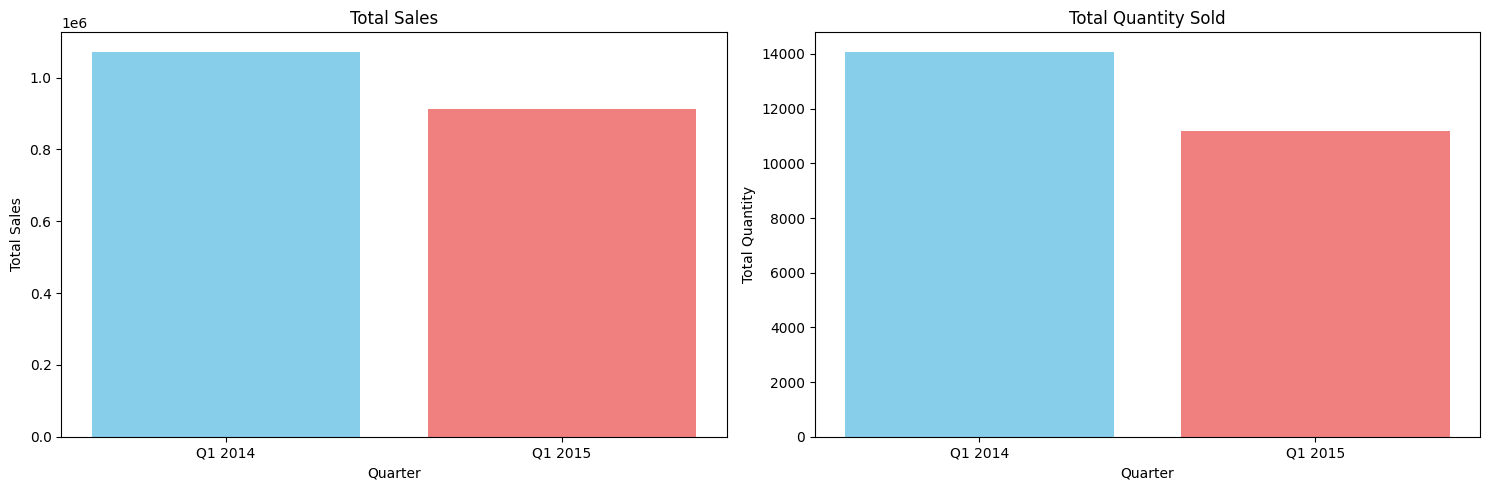

In [9]:
# Separate Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Total Sales
axes[0].bar(['Q1 2014', 'Q1 2015'], [total_sales_q1_2014, total_sales_q1_2015], color=['skyblue', 'lightcoral'])
axes[0].set_title('Total Sales')
axes[0].set_ylabel('Total Sales')
axes[0].set_xlabel('Quarter')

# Total Quantity Sold
axes[1].bar(['Q1 2014', 'Q1 2015'], [total_quantity_q1_2014, total_quantity_q1_2015], color=['skyblue', 'lightcoral'])
axes[1].set_title('Total Quantity Sold')
axes[1].set_ylabel('Total Quantity')
axes[1].set_xlabel('Quarter')

plt.tight_layout()
plt.show()


**Best Selling Product and Sub-Product in each Quarter**

In [10]:
max_sales_2014 = performance['Total_Sales_2014'].max()
highest_product_2014 = performance[performance['Total_Sales_2014'] == max_sales_2014]

max_sales_2015 = performance['Total_Sales_2015'].max()
highest_product_2015 = performance[performance['Total_Sales_2015'] == max_sales_2015]


print("Best Selling Product and Sub-Product in Q1 2014:")
print(highest_product_2014[['Product Category', 'Product Sub-Category', 'Total_Sales_2014']])

print("\nBest Selling Product Sub-Product in Q1 2015:")
print(highest_product_2015[['Product Category', 'Product Sub-Category', 'Total_Sales_2015']])


Best Selling Product and Sub-Product in Q1 2014:
  Product Category Product Sub-Category  Total_Sales_2014
1        Furniture   Chairs & Chairmats         153034.54

Best Selling Product Sub-Product in Q1 2015:
   Product Category Product Sub-Category  Total_Sales_2015
15       Technology      Office Machines         220562.18


**Worst Selling Product and Sub-Product in each Quarter**

In [11]:
min_sales_2014 = performance['Total_Sales_2014'].min()
lowest_product_2014 = performance[performance['Total_Sales_2014'] == min_sales_2014]

min_sales_2015 = performance['Total_Sales_2015'].min()
lowest_product_2015 = performance[performance['Total_Sales_2015'] == min_sales_2015]

print("Worst Selling Product and Sub-Product in Q1 2014:")
print(lowest_product_2014[['Product Category', 'Product Sub-Category', 'Total_Sales_2014']])

print("\nWorst Selling Product Sub-Product in Q1 2015:")
print(lowest_product_2015[['Product Category', 'Product Sub-Category', 'Total_Sales_2015']])


Worst Selling Product and Sub-Product in Q1 2014:
   Product Category Product Sub-Category  Total_Sales_2014
10  Office Supplies         Rubber Bands           1378.88

Worst Selling Product Sub-Product in Q1 2015:
   Product Category Product Sub-Category  Total_Sales_2015
10  Office Supplies         Rubber Bands            367.36


**Overall Performance Visualization**

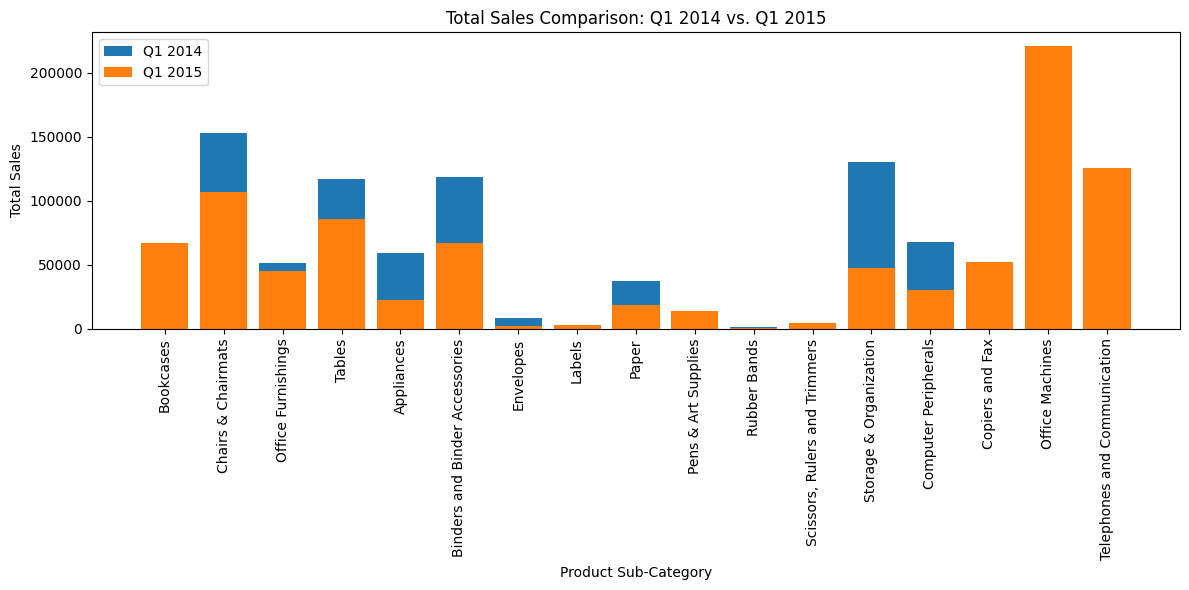

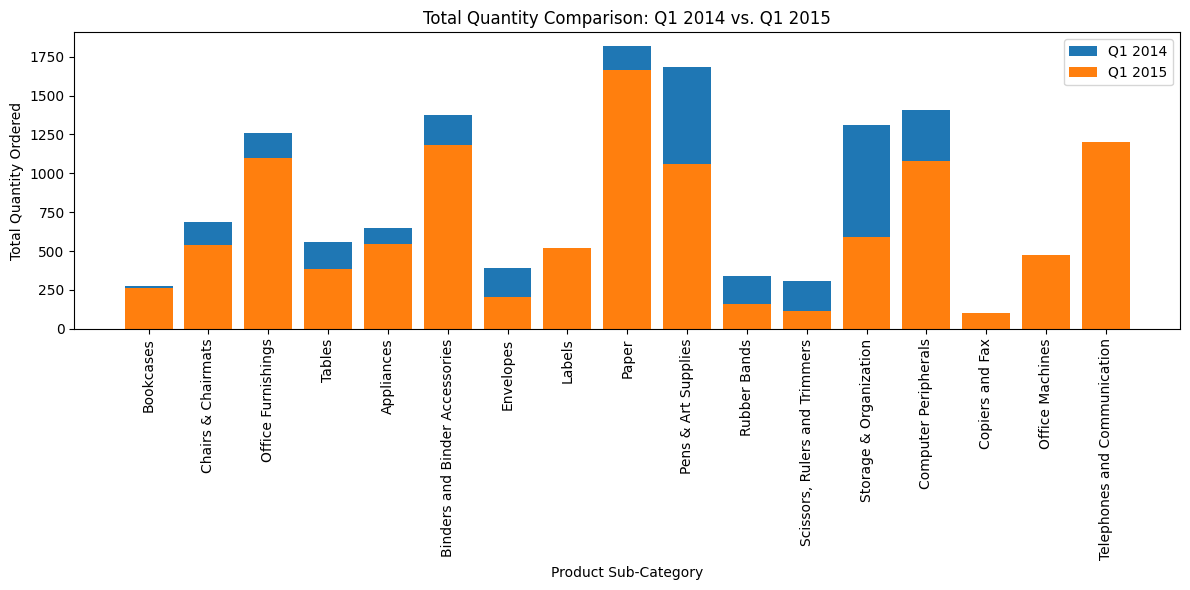

In [12]:
# Total Sales for Q1 2014 and Q1 2015
plt.figure(figsize=(12, 6))
plt.bar(performance['Product Sub-Category'], performance['Total_Sales_2014'], label='Q1 2014')
plt.bar(performance['Product Sub-Category'], performance['Total_Sales_2015'], label='Q1 2015')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison: Q1 2014 vs. Q1 2015')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Total Quantity for Q1 2014 and Q1 2015
plt.figure(figsize=(12, 6))
plt.bar(performance['Product Sub-Category'], performance['Total_Quantity_2014'], label='Q1 2014')
plt.bar(performance['Product Sub-Category'], performance['Total_Quantity_2015'], label='Q1 2015')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Comparison: Q1 2014 vs. Q1 2015')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

**2. Geographic Performance (by Region and State)**

In [13]:
#Info Total Sales by Region and State
sales_data['Sales'] = sales_data['Unit Price'] * sales_data['Quantity ordered new']
total_geo_performance = sales_data.groupby(['Region', 'State']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Quantity=('Quantity ordered new', 'sum')
).reset_index()

total_geo_performance.head()

,Region,State,Total_Sales,Total_Quantity
0,Central,Illinois,101081.79,1382
1,Central,Indiana,40872.58,571
2,Central,Iowa,11748.72,244
3,Central,Kansas,30715.17,300
4,Central,Michigan,71393.32,906


**Region Performance per Quarter**

In [14]:
# Region and State Performance Q1 2015
geo_performance_2014 = q1_2014_data.groupby(['Region', 'State']).agg(
    Total_Sales_2014=('Sales', 'sum'),
    Total_Quantity_2014=('Quantity ordered new', 'sum')
).reset_index()

# Region and State Performance Q1 2015
geo_performance_2015 = q1_2015_data.groupby(['Region', 'State']).agg(
    Total_Sales_2015=('Sales', 'sum'),
    Total_Quantity_2015=('Quantity ordered new', 'sum')
).reset_index()

# Comparison
geo_performance = pd.merge(geo_performance_2014, geo_performance_2015,
                           on=['Region', 'State'], how='outer').fillna(0)

In [15]:
geo_performance.head()

,Region,State,Total_Sales_2014,Total_Quantity_2014,Total_Sales_2015,Total_Quantity_2015
0,Central,Illinois,56912.38,651,44169.41,731.0
1,Central,Indiana,22679.76,348,18192.82,223.0
2,Central,Iowa,2891.73,63,8856.99,181.0
3,Central,Kansas,22334.10,144,8381.07,156.0
4,Central,Michigan,30471.11,323,40922.21,583.0


**Performance Bar Charts by Region (Q1 2014 & Q1 2015)**

In [16]:
import altair as alt

#Q1 2014
alt.Chart(geo_performance).mark_bar().encode(
    x='Region',
    y='Total_Sales_2014',
    color='Region'
).properties(
    title="Total Sales by Region in Q1 2014",
    width=650,
    height=300
).display()

# Q1 2014
alt.Chart(geo_performance).mark_bar().encode(
    x='Region',
    y='Total_Sales_2015',
    color='Region'
).properties(
    title="Total Sales by Region in Q1 2015",
    width=650,
    height=300
).display()


alt.Chart(...)

alt.Chart(...)

**Performance Bar Charts by State (Q1 2014 & Q1 2015)**

In [17]:
# Analysis by state within each region:
for region in geo_performance['Region'].unique():
  region_data = geo_performance[geo_performance['Region'] == region]
  region_data_sorted = region_data.sort_values(by='Total_Sales_2014', ascending=False)

  alt.Chart(region_data_sorted).mark_bar().encode(
      x='State',
      y='Total_Sales_2014',
      color='State',
      tooltip=['State', 'Total_Sales_2014', 'Total_Sales_2015']
  ).properties(
      title=f"Total Sales by State in {region} - Q1 2014",
      width=650,
      height=400
  ).display()

  alt.Chart(region_data_sorted).mark_bar().encode(
      x='State',
      y='Total_Sales_2015',
      color='State',
      tooltip=['State', 'Total_Sales_2014','Total_Sales_2015']
  ).properties(
      title=f"Total Sales by State in {region} - Q1 2015",
      width=650,
      height=400
  ).display()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

**3. Sales Evolution over 7 rolling days for Q1 2015 and Q1 2014**

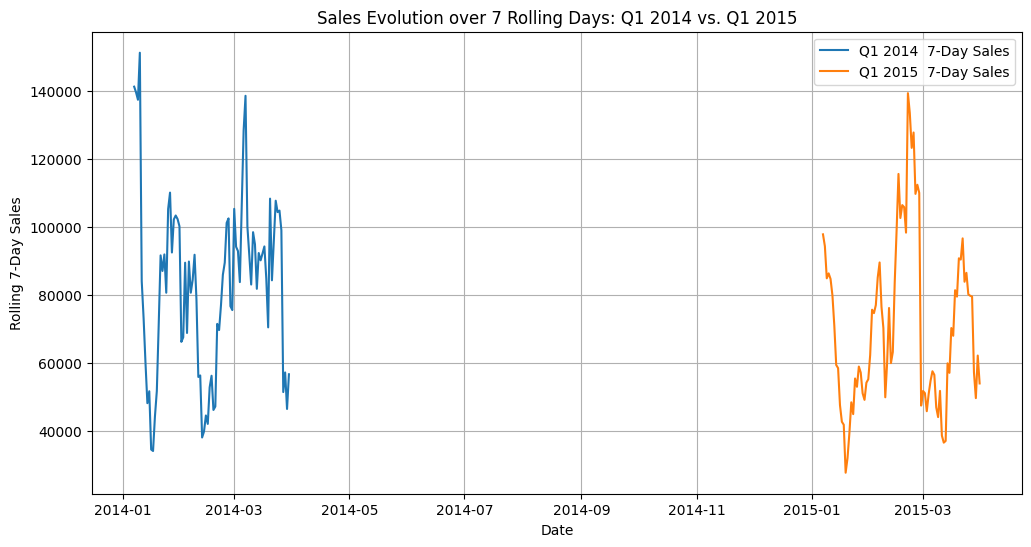

In [18]:
# rolling 7-day sales for Q1 2014
q1_2014_sales_evolution = q1_2014_data.set_index('Order Date').resample('D')['Sales'].sum().rolling(window=7).sum()
# rolling 7-day sales for Q1 2015
q1_2015_sales_evolution = q1_2015_data.set_index('Order Date').resample('D')['Sales'].sum().rolling(window=7).sum()


# Plot
plt.figure(figsize=(12, 6))
plt.plot(q1_2014_sales_evolution, label='Q1 2014  7-Day Sales')
plt.plot(q1_2015_sales_evolution, label='Q1 2015  7-Day Sales')
plt.xlabel('Date')
plt.ylabel('Rolling 7-Day Sales')
plt.title('Sales Evolution over 7 Rolling Days: Q1 2014 vs. Q1 2015')
plt.legend()
plt.grid(True)
plt.show()
